
Model is saved



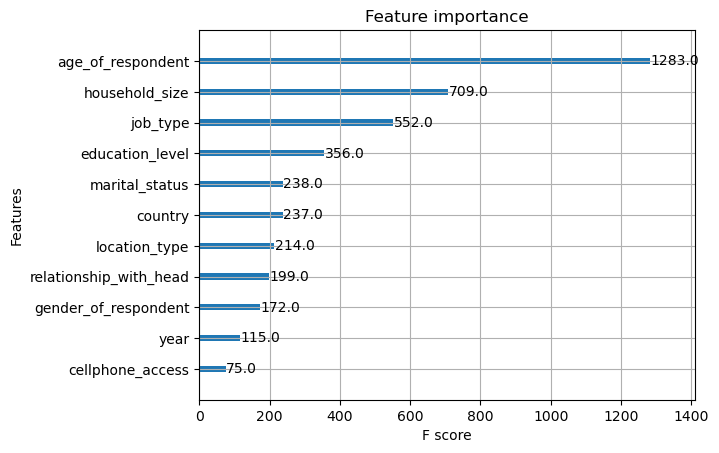

In [3]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import StandardScaler, LabelEncoder

data = pd.read_csv('Financial_inclusion_dataset (1).csv')
df = data.copy()
df.drop('uniqueid', inplace = True , axis = 1)

categoricals = df.select_dtypes(include = ['object', 'category'])
numericals = df.select_dtypes(include = 'number')

scaler = StandardScaler()
encoder = LabelEncoder()

for i in numericals.columns: 
    if i in df.columns: 
        df[i] = scaler.fit_transform(df[[i]]) 
for i in categoricals.columns:
    if i in df.columns: 
        df[i] = encoder.fit_transform(df[i])

x = df.drop('bank_account',axis = 1)
y = df.bank_account

# - Using XGBOOST to find feature importance
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(x, y)

# Print feature importance scores
xgb.plot_importance(model)

sel_cols = ['age_of_respondent', 'education_level', 'household_size', 'job_type', 'marital_status']
x = df[sel_cols]

df= pd.concat([x, y], axis =1) 
class1 = df.loc[df['bank_account'] == 1]
class0 = df.loc[df['bank_account'] == 0] 
class1_3000 = class0.sample(5000) 
new_dataframe = pd.concat([class1_3000, class1], axis = 0)

x = new_dataframe.drop('bank_account', axis = 1)
y = new_dataframe['bank_account']

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 40, stratify = y)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

model = RandomForestClassifier() 
model.fit(xtrain, ytrain) 
cross_validation = model.predict(xtrain)
pred = model.predict(xtest) 

# save model
model = pickle.dump(model, open('Financial_inclusion.pkl', 'wb'))
print('\nModel is saved\n')

